In [1]:
# 必要なライブラリをimportします
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# 可視化のためのセットです。
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression

#現在の最大表示列数の出力
pd.get_option("display.max_columns")

#最大表示列数の指定（ここでは50列を指定）
pd.set_option('display.max_columns', 50)


In [2]:
# データフレーム読み込み
girls_frame = pd.read_clipboard()

# 出会いの値を置換
girls_frame = girls_frame.replace(['東カレ','ティンダー','ナンパ','ノーマル','就活'],['tokyo_calender','tinder','nanpa','normal','normal'])
girls_frame.head(1)

,id,date,name,encounter,maniac,favorably,aggressiveness,magic,wanted,success,LorD,app_ex,status,independence,educational_rate,face_rate,charm_score,fashion,height,shape,head_and_body,my_behavior,opps_behavior
0,1,2020/07,今井乃々,tokyo_calender,4.0,4.0,3.0,1,9,3,D,1,7,5.0,7,65,5.0,3.5,154,普通,6.5,open,normal


In [3]:
# 普通の出会いかそれ以外かを選別する関数
def app_or_normal(value):
    if value is 'normal':
        return 1
    else:
        return 0

In [4]:
# ノーマルな出会いと不純な出会いを選別するカラムを追加
girls_frame['app_or_normal'] = girls_frame.encounter.apply(app_or_normal)
girls_frame.head(1)

,id,date,name,encounter,maniac,favorably,aggressiveness,magic,wanted,success,LorD,app_ex,status,independence,educational_rate,face_rate,charm_score,fashion,height,shape,head_and_body,my_behavior,opps_behavior,app_or_normal
0,1,2020/07,今井乃々,tokyo_calender,4.0,4.0,3.0,1,9,3,D,1,7,5.0,7,65,5.0,3.5,154,普通,6.5,open,normal,0


In [5]:
def scale_change(value):
    return 10*((value - 40)/(70 - 43))

In [6]:
# 顔面偏差値をスケーリング
girls_frame['face_rate_'] = girls_frame.face_rate.apply(scale_change)
girls_frame.head(1)

,id,date,name,encounter,maniac,favorably,aggressiveness,magic,wanted,success,LorD,app_ex,status,independence,educational_rate,face_rate,charm_score,fashion,height,shape,head_and_body,my_behavior,opps_behavior,app_or_normal,face_rate_
0,1,2020/07,今井乃々,tokyo_calender,4.0,4.0,3.0,1,9,3,D,1,7,5.0,7,65,5.0,3.5,154,普通,6.5,open,normal,0,9.259259


In [7]:
# 顔面偏差値、ステータスなどの特徴を合わせたカラムを作成
girls_frame['face+status'] = girls_frame['face_rate_']+girls_frame['status']
girls_frame['face+status+inde'] = girls_frame['face+status']+2*girls_frame['independence']
girls_frame['face+edu'] = girls_frame['face_rate_']+girls_frame['educational_rate']
girls_frame['face+edu+inde'] = girls_frame['face+edu'] + 2*girls_frame['independence']

In [8]:
girls_frame['gain_score'] = girls_frame['success'] - girls_frame['wanted']

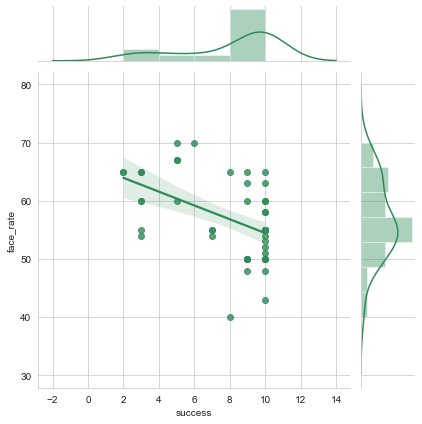

In [9]:
sns.jointplot('success','face_rate',girls_frame,kind='reg',color='seagreen')

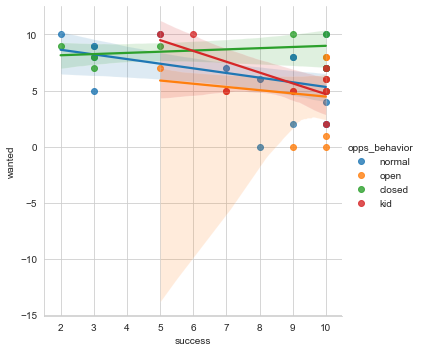

In [19]:
fig = sns.lmplot(data=girls_frame,
                   x='success',y='wanted',hue='opps_behavior')

fig.savefig('fig2.png')
# アプリじゃない時は相関が弱い(デートに行ける時点で勝ち確)

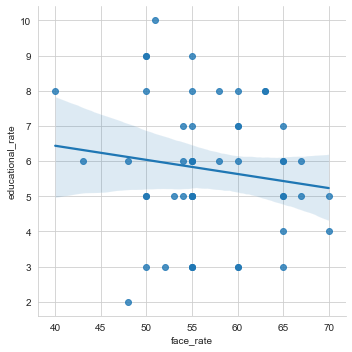

In [11]:
sns.lmplot(data=girls_frame,
                   x='face_rate',y='educational_rate')

# 顔と学歴の相関

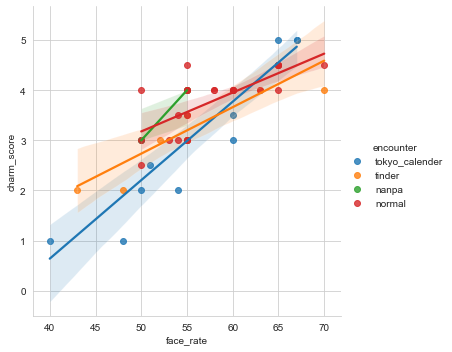

In [12]:
sns.lmplot(data=girls_frame,
                   x='face_rate',y='charm_score',hue='encounter')

fig.savefig('fig.png')
# アプリの時は強い相関
# アプリの時はその人の中身を「魅力」として加味しておらず、顔面偏差値（見た目:服装なども含む）が魅力に直結する

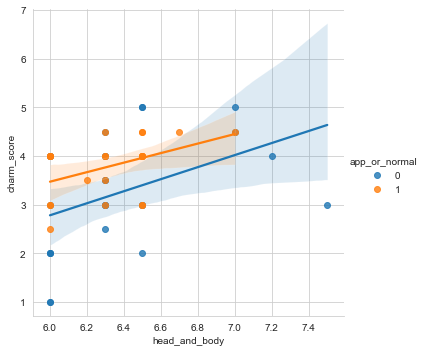

In [13]:
sns.lmplot(data=girls_frame,
                   x='head_and_body',y='charm_score',hue='app_or_normal')

#スタイルと魅力

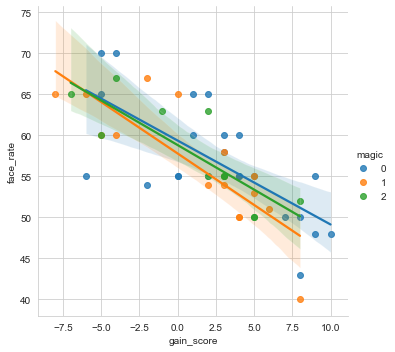

In [14]:
sns.lmplot(data=girls_frame,
                   x='gain_score',y='face_rate',hue='magic')

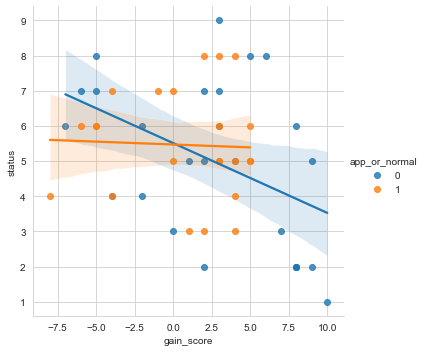

In [15]:
sns.lmplot(data=girls_frame,
                   x='gain_score',y='status',hue='app_or_normal')

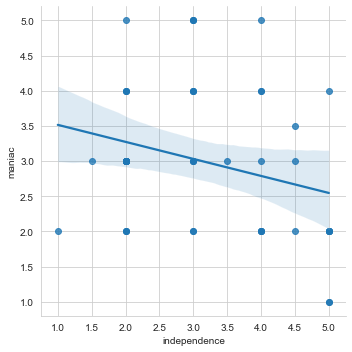

In [39]:
sns.lmplot(data=girls_frame,
                   x='independence',y='maniac')

In [21]:
girls_frame.sort_values('gain_score',ascending=False).reset_index().drop(['id','index'],1)

,date,name,encounter,maniac,favorably,aggressiveness,magic,wanted,success,LorD,app_ex,status,independence,educational_rate,face_rate,charm_score,fashion,height,shape,head_and_body,my_behavior,opps_behavior,app_or_normal,face_rate_,face+status,face+status+inde,face+edu,face+edu+inde,gain_score
0,2019/12,アパレル,tinder,2.0,4.5,5.0,0,0,10,N,2,1,2.0,2,48,2.0,2.5,157,太り気味,6.0,open,open,0,2.962963,3.962963,7.962963,4.962963,8.962963,10
1,2020/06,うさぎ,tokyo_calender,5.0,3.0,3.0,0,0,9,Ｌ,2,5,3.0,6,48,1.0,2.0,157,病的な痩せ型,6.0,open,open,0,2.962963,7.962963,13.962963,8.962963,14.962963,9
2,2020/03,スケボー,tokyo_calender,5.0,3.0,4.0,0,1,10,D,1,2,2.0,3,55,3.0,2.0,157,普通,6.3,kid,open,0,5.555556,7.555556,11.555556,8.555556,12.555556,9
3,2020/06,おっぱい,tokyo_calender,2.0,3.0,2.0,1,0,8,Ｌ,1,6,4.0,8,40,1.0,2.0,168,太り気味,6.0,open,normal,0,0.000000,6.000000,14.000000,8.000000,16.000000,8
4,2020/01,高校生,tinder,2.0,4.5,4.5,2,2,10,D,1,2,2.0,3,52,3.0,3.0,153,太り気味,6.0,kid,normal,0,4.444444,6.444444,10.444444,7.444444,11.444444,8
5,2019/12,星空,tinder,4.0,4.5,4.5,0,2,10,N,2,2,3.0,6,43,2.0,1.5,157,太り気味,6.0,open,normal,0,1.111111,3.111111,9.111111,7.111111,13.111111,8
6,2020/04,藤波,tokyo_calender,2.0,4.5,5.0,0,2,10,N,2,2,3.0,3,50,3.0,2.0,155,普通,6.3,kid,kid,0,3.703704,5.703704,11.703704,6.703704,12.703704,8
7,2020/03,ちつね,tokyo_calender,4.0,3.0,3.0,0,2,9,Ｌ,1,3,3.0,9,50,2.0,2.0,155,普通,6.0,open,normal,0,3.703704,6.703704,12.703704,12.703704,18.703704,7
8,2020/03,京都,tokyo_calender,2.0,4.5,4.5,1,4,10,D,1,8,5.0,10,51,2.5,2.0,164,太り気味,6.3,open,normal,0,4.074074,12.074074,22.074074,14.074074,24.074074,6
9,2017/10,ねぎし,normal,4.0,4.5,4.0,0,5,10,D,0,6,3.0,6,55,4.5,2.5,153,普通,6.3,open,kid,1,5.555556,11.555556,17.555556,11.555556,17.555556,5


In [26]:
time_df = girls_frame.sort_values('date').reset_index()
time_df = time_df.drop(['id','index'],1)

In [27]:
time_df

,date,name,encounter,maniac,favorably,aggressiveness,magic,wanted,success,LorD,app_ex,status,independence,educational_rate,face_rate,charm_score,fashion,height,shape,head_and_body,my_behavior,opps_behavior,app_or_normal,face_rate_,face+status,face+status+inde,face+edu,face+edu+inde,gain_score
0,2014/07,くしや,normal,3.0,4.0,2.0,0,9,3,D,0,6,3.0,6,55,4.0,3.0,158,痩せ型,6.0,open,normal,1,5.555556,11.555556,17.555556,11.555556,17.555556,-6
1,2014/10,まいか,normal,3.0,3.0,1.0,0,8,9,D,0,3,2.0,3,60,4.0,2.5,155,普通,6.0,kid,normal,1,7.407407,10.407407,14.407407,10.407407,14.407407,1
2,2015/04,ひるま,normal,4.0,4.5,3.0,0,10,10,D,0,7,4.0,7,55,4.0,2.5,155,普通,6.0,open,normal,1,5.555556,12.555556,20.555556,12.555556,20.555556,0
3,2015/07,市崎,normal,3.0,4.5,4.0,1,7,10,L,0,5,2.0,5,54,3.0,2.5,158,痩せ型,6.3,kid,closed,1,5.185185,10.185185,14.185185,10.185185,14.185185,3
4,2015/08,ちひろ,normal,3.0,3.0,2.0,0,6,10,D,0,3,2.0,3,55,3.0,2.5,160,痩せ型,6.5,kid,open,1,5.555556,8.555556,12.555556,8.555556,12.555556,4
5,2015/08,あおい,normal,3.0,4.5,4.0,2,5,10,D,0,5,2.0,5,50,3.0,2.5,158,普通,6.0,kid,normal,1,3.703704,8.703704,12.703704,8.703704,12.703704,5
6,2015/10,いざわ,normal,4.0,3.0,1.0,1,10,2,D,0,4,2.0,4,65,4.5,3.5,154,痩せ型,6.5,open,normal,1,9.259259,13.259259,17.259259,13.259259,17.259259,-8
7,2015/10,エイシン,normal,3.0,4.5,4.0,1,5,10,D,0,5,3.0,5,53,3.0,2.5,157,痩せ型,6.5,open,open,1,4.814815,9.814815,15.814815,9.814815,15.814815,5
8,2016/06,おがの,normal,3.0,3.0,2.0,2,10,5,D,0,6,4.0,6,60,4.0,3.0,155,痩せ型,6.3,open,normal,1,7.407407,13.407407,21.407407,13.407407,21.407407,-5
9,2016/07,水野,normal,4.0,3.0,2.0,2,7,10,D,0,5,2.0,5,55,3.5,2.0,154,痩せ型,6.3,open,open,1,5.555556,10.555556,14.555556,10.555556,14.555556,3


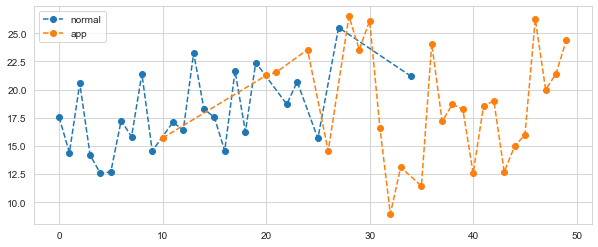

In [40]:
time_df.query('app_or_normal ==1')['face+edu+inde'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o',label='normal')
time_df.query('app_or_normal ==0')['face+edu+inde'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o',label='app')

In [45]:
model = LinearRegression()

In [42]:
# X_girl = girls_frame.drop(['success','id','name','date','gain_score'],1)
X_girl = girls_frame[['wanted','face_rate_','fashion','educational_rate','encounter','height','opps_behavior','LorD']]
X_girl = X_girl.replace(['D','Ｌ','L','N'],[2,1,1,0])
X_girl = X_girl.replace(['痩せ型','普通','太り気味','病的な痩せ型'],[2,1,0,3])
X_girl = X_girl.replace(['tokyo_calender','tinder','nanpa','normal'],[3,2,1,0])
X_girl = X_girl.replace(['open','kid','closed','normal'],[2,1,0,3])
Y_girl = girls_frame.success

In [43]:
X_girl.head(1)

,wanted,face_rate_,fashion,educational_rate,encounter,height,opps_behavior,LorD
0,9,9.259259,3.5,7,3,154,0,2


In [46]:
model.fit(X_girl,Y_girl)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# 新しいDataFrameを作ります。
coeff_df = DataFrame(X_girl.columns)
coeff_df.columns = ['Features']

#求められた係数を代入します。
coeff_df["Coefficient Estimate"] = pd.Series(model.coef_)

coeff_df

,Features,Coefficient Estimate
0,wanted,-0.283658
1,face_rate_,-0.315060
2,fashion,-0.945425
3,educational_rate,-0.070419
4,encounter,-0.244323
5,height,-0.014149
6,opps_behavior,0.101084
7,LorD,1.445106


In [48]:
# 説明変数をX、目的変数をYとして受け取ります。
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_girl,girls_frame.success)

In [49]:
print(X_train.shape , X_test.shape , Y_train.shape , Y_test.shape)

(37, 8) (13, 8) (37,) (13,)


In [50]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

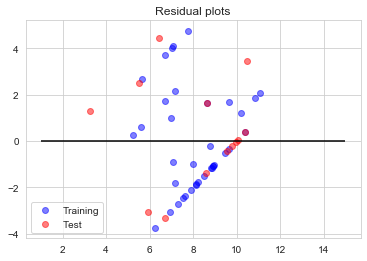

In [51]:
# 推論
pred_train = model.predict(X_train)
pred_test  = model.predict(X_test)

# 分散
np.mean((Y_train - pred_train)**2)
np.mean((Y_test - pred_test)**2)


train = plt.scatter(pred_train, (pred_train-Y_train), c='b',alpha=0.5)
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)
plt.hlines(y=0, xmin=1.0,xmax= 15)

plt.legend((train,test),('Training','Test'), loc='lower left')
plt.title('Residual plots')
plt.savefig('selected_feature.png')

In [31]:
girls_frame.to_csv('my_loves.csv')